<a href="https://colab.research.google.com/github/AabidMK/CricketIQ_Infosys_Internship_Feb2025/blob/Durga-Jaya-Malleswari-Tommandru/Durga%20deliveries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/deliveries.csv (1).zip")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:
print(data.describe())

           match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.000000       2.000000   
50%    9.809670e+05       1.000000       9.000000       4.000000   
75%    1.254066e+06       2.000000      14.000000       5.000000   
max    1.426312e+06       6.000000      19.000000      11.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  
count  260920.000000  260920.000000  260920.000000  260920.000000  
mean        1.265001       0.067806       1.332807       0.049632  
std         1.639298       0.343265       1.626416       0.217184  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000

In [ ]:
# Set style
sns.set(style="whitegrid")

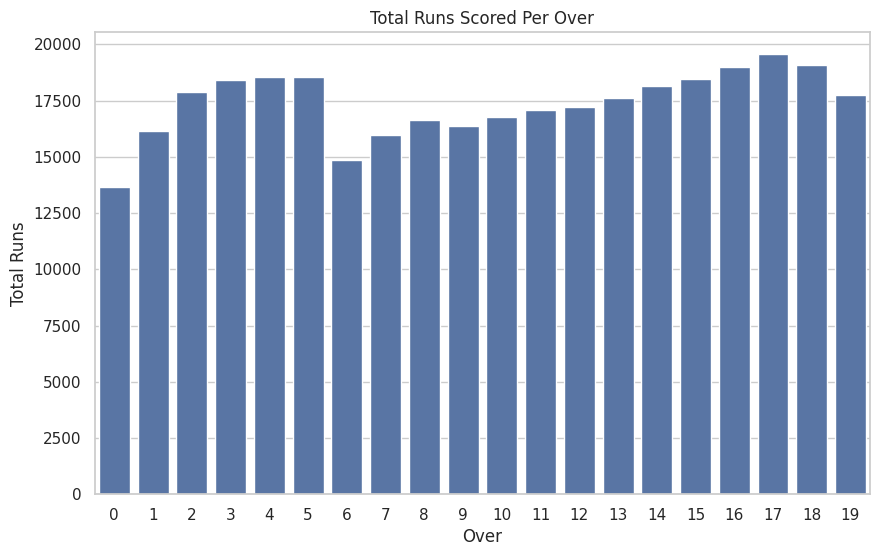

In [ ]:
# 1. Total Runs Scored Per Over
plt.figure(figsize=(10, 6))
runs = data.groupby("over")["total_runs"].sum()
sns.barplot(x=runs.index, y=runs.values)
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.title("Total Runs Scored Per Over")
plt.show()

<ipython-input-39-f963eafede55>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissal_counts.index, y=dismissal_counts.values, palette="coolwarm")


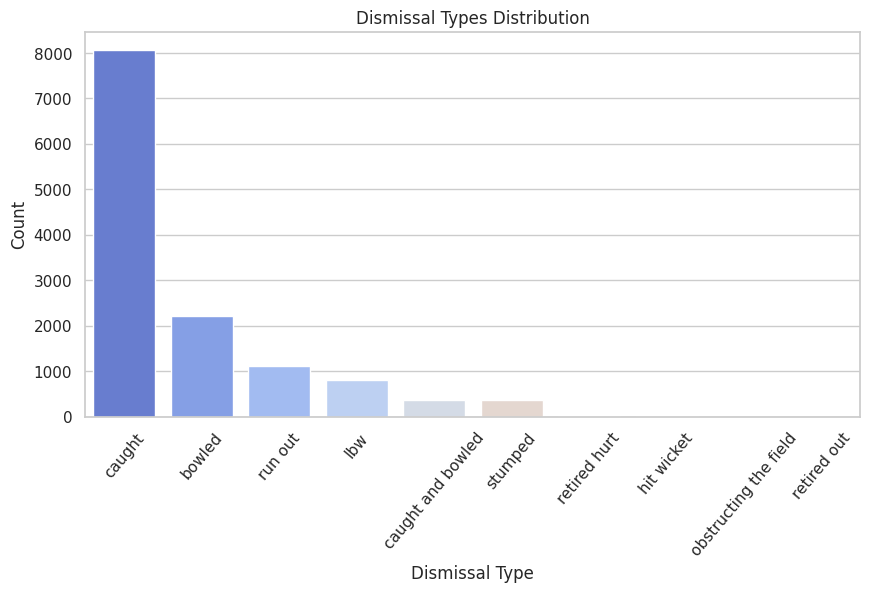

In [ ]:
# 2. Dismissal Types Distribution
plt.figure(figsize=(10, 5))
dismissal_counts = data["dismissal_kind"].value_counts()
sns.barplot(x=dismissal_counts.index, y=dismissal_counts.values, palette="coolwarm")
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.title("Dismissal Types Distribution")
plt.xticks(rotation=50)
plt.show()

<ipython-input-43-f80d4e099a27>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=extra_runs.index, x=extra_runs.values, palette="magma")


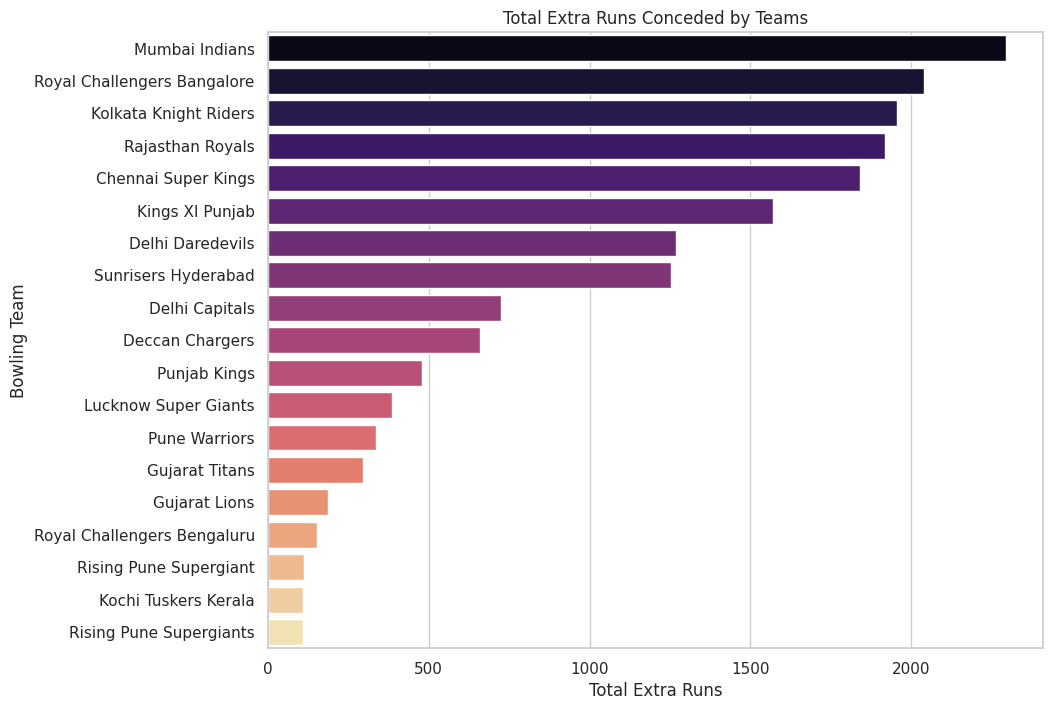

In [ ]:
# 3. Total Extra Runs Conceded by Teams
plt.figure(figsize=(10, 8))
extra_runs = data.groupby("bowling_team")["extra_runs"].sum().sort_values(ascending=False)
sns.barplot(y=extra_runs.index, x=extra_runs.values, palette="magma")
plt.xlabel("Total Extra Runs")
plt.ylabel("Bowling Team")
plt.title("Total Extra Runs Conceded by Teams")
plt.show()

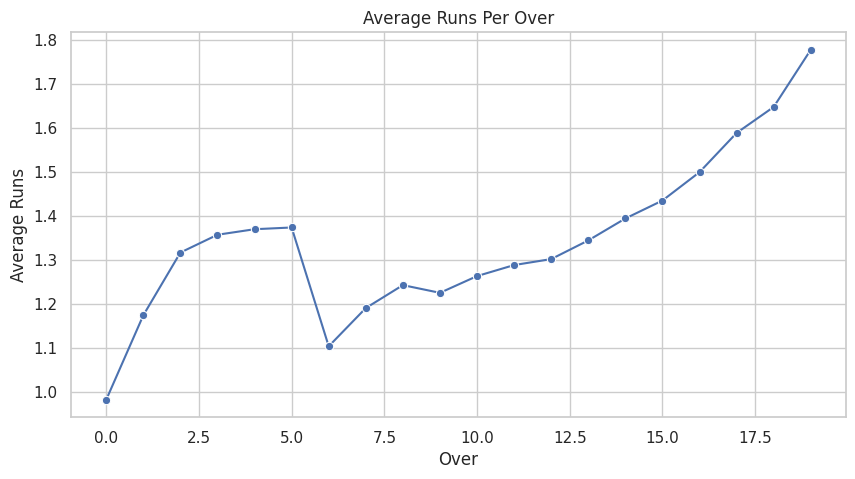

In [ ]:
# 4. Average Runs Per Over
plt.figure(figsize=(10, 5))
over_avg_runs = data.groupby("over")["total_runs"].mean()
sns.lineplot(x=over_avg_runs.index, y=over_avg_runs.values, marker="o", color="b")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.title("Average Runs Per Over")
plt.show()

<ipython-input-17-f67e4cee3035>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_distribution.index, y=runs_distribution.values, palette="cubehelix")


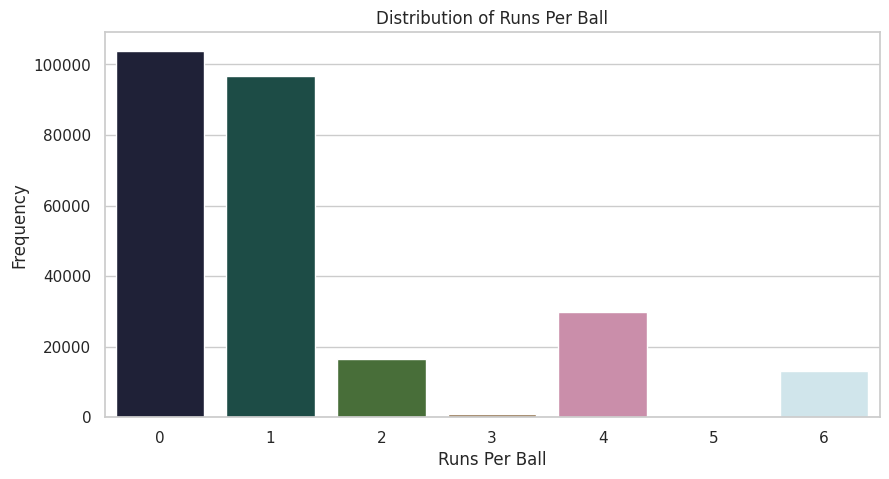

In [ ]:
# 5. Distribution of Runs Per Ball
plt.figure(figsize=(10, 5))
runs_distribution = data["batsman_runs"].value_counts().sort_index()
sns.barplot(x=runs_distribution.index, y=runs_distribution.values, palette="cubehelix")
plt.xlabel("Runs Per Ball")
plt.ylabel("Frequency")
plt.title("Distribution of Runs Per Ball")
plt.show()

<ipython-input-18-b1e3489434f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=batsman_stats.index, x=batsman_stats["strike_rate"], palette="plasma")


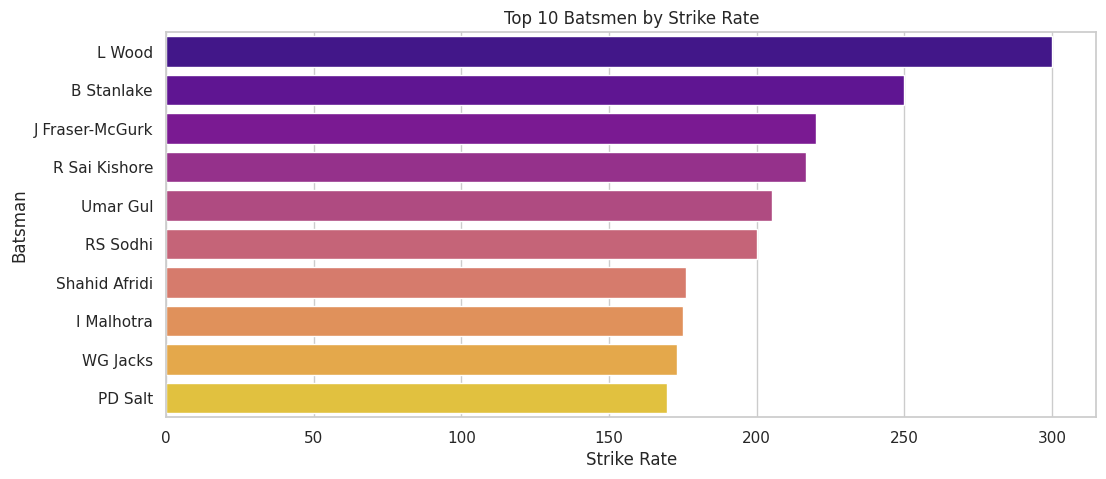

In [ ]:
# 6. Top 10 Batsmen by Strike Rate
batsman_stats = data.groupby("batter").agg({"batsman_runs": "sum", "ball": "count"})
batsman_stats["strike_rate"] = (batsman_stats["batsman_runs"] / batsman_stats["ball"]) * 100
batsman_stats = batsman_stats.nlargest(10, "strike_rate")
plt.figure(figsize=(12, 5))
sns.barplot(y=batsman_stats.index, x=batsman_stats["strike_rate"], palette="plasma")
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.title("Top 10 Batsmen by Strike Rate")
plt.show()

<ipython-input-19-e52a73149d79>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sixes.index, x=sixes.values, palette="inferno")


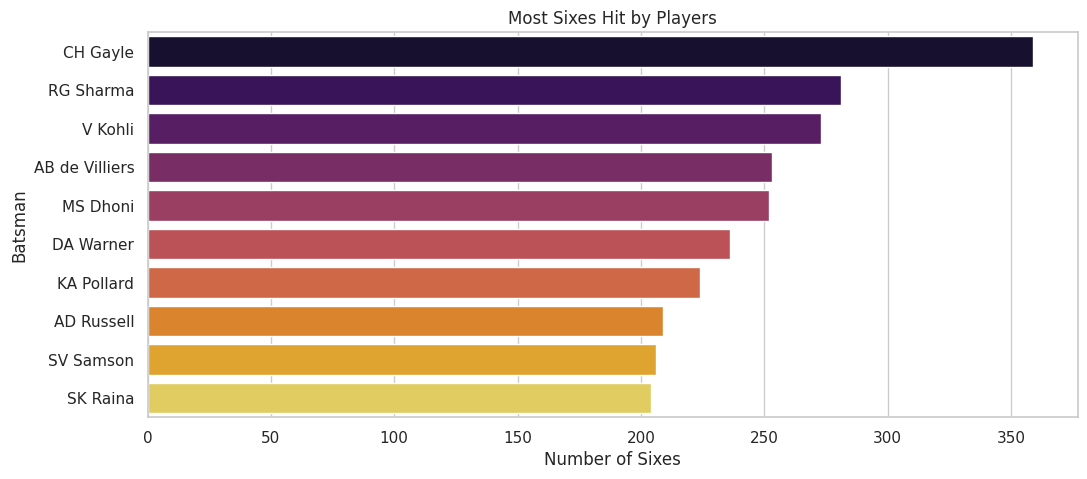

In [ ]:
# 7. Most Sixes Hit by Players
sixes = data[data["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count().nlargest(10)
plt.figure(figsize=(12, 5))
sns.barplot(y=sixes.index, x=sixes.values, palette="inferno")
plt.xlabel("Number of Sixes")
plt.ylabel("Batsman")
plt.title("Most Sixes Hit by Players")
plt.show()

<ipython-input-20-4383c158b644>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dot_percentage.index, x=dot_percentage.values, palette="cividis")


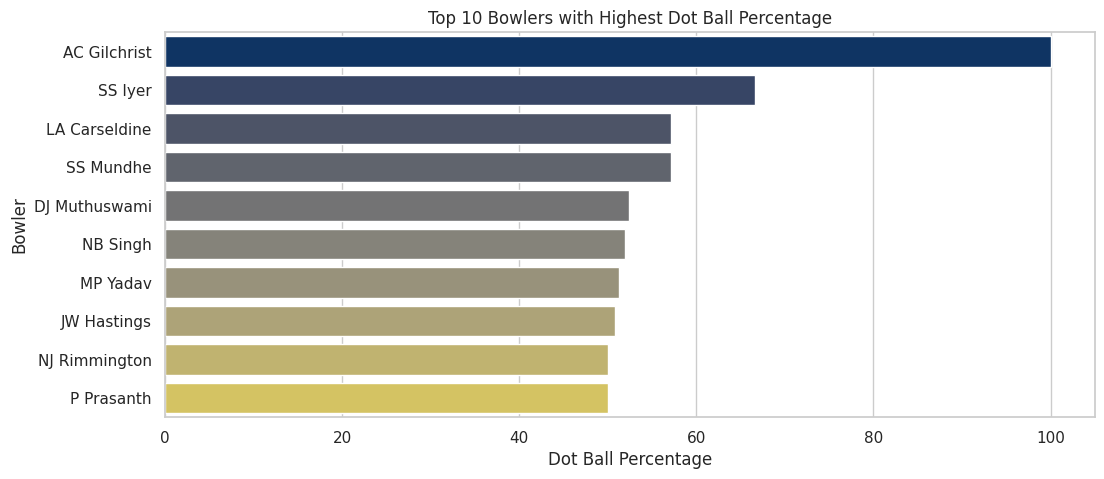

In [ ]:
# 8. Dot Ball Percentage by Bowler
dot_balls = data[data["total_runs"] == 0].groupby("bowler")["ball"].count()
total_balls = data.groupby("bowler")["ball"].count()
dot_percentage = (dot_balls / total_balls * 100).dropna().nlargest(10)
plt.figure(figsize=(12, 5))
sns.barplot(y=dot_percentage.index, x=dot_percentage.values, palette="cividis")
plt.xlabel("Dot Ball Percentage")
plt.ylabel("Bowler")
plt.title("Top 10 Bowlers with Highest Dot Ball Percentage")
plt.show()

<ipython-input-21-c3196256096f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=boundaries.index, x=boundaries.values, palette="coolwarm")


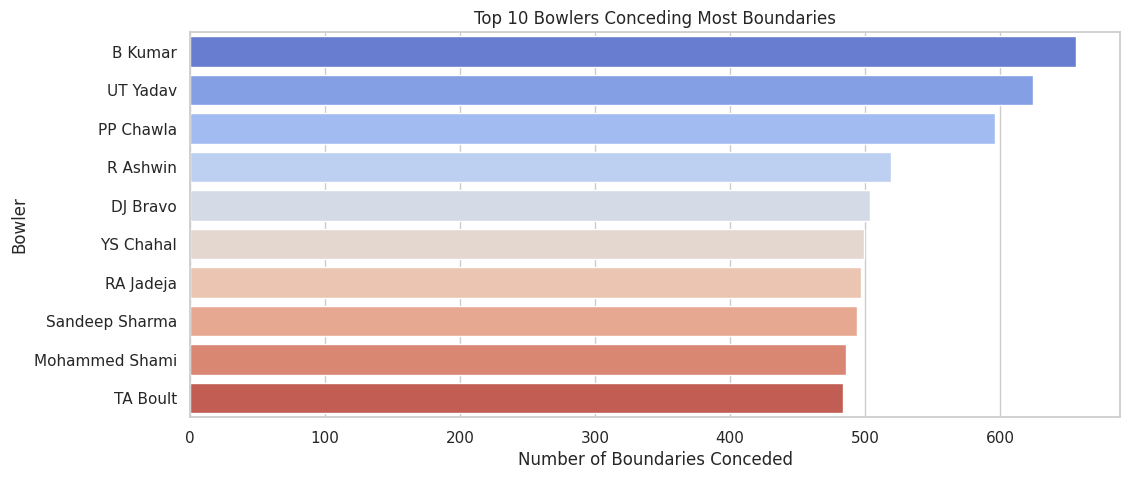

In [ ]:
# 9. Top 10 Bowlers Conceding Most Boundaries
boundaries = data[data["batsman_runs"].isin([4, 6])].groupby("bowler")["batsman_runs"].count().nlargest(10)
plt.figure(figsize=(12, 5))
sns.barplot(y=boundaries.index, x=boundaries.values, palette="coolwarm")
plt.xlabel("Number of Boundaries Conceded")
plt.ylabel("Bowler")
plt.title("Top 10 Bowlers Conceding Most Boundaries")
plt.show()

<ipython-input-22-4bd40107e130>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_per_over.index, y=wickets_per_over.values, palette="Blues")


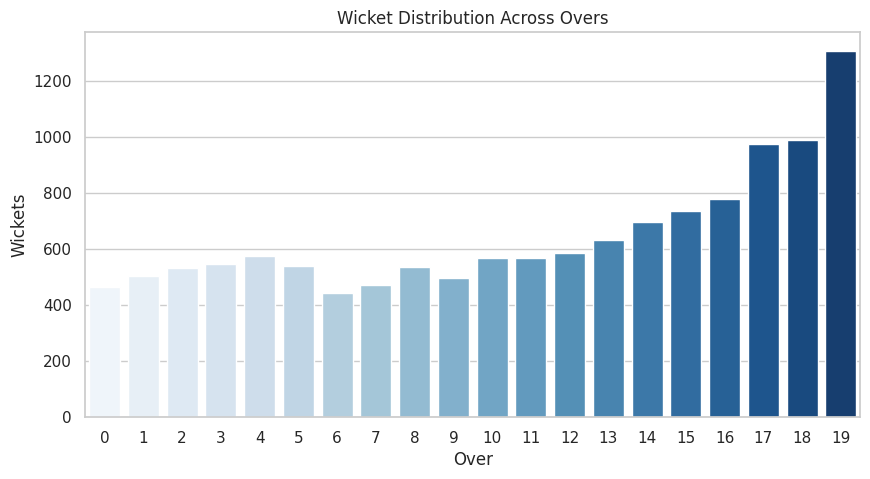

In [ ]:
# 10. Wicket Distribution Across Overs
plt.figure(figsize=(10, 5))
wickets_per_over = data[data["is_wicket"] == 1].groupby("over")["is_wicket"].count()
sns.barplot(x=wickets_per_over.index, y=wickets_per_over.values, palette="Blues")
plt.xlabel("Over")
plt.ylabel("Wickets")
plt.title("Wicket Distribution Across Overs")
plt.show()

In [ ]:
# 11. Total Runs Scored in Powerplay (Overs 0-5)
powerplay_runs = data[data["over"] < 6]["total_runs"].sum()
print(f"Total Runs Scored in Powerplay: {powerplay_runs}")

Total Runs Scored in Powerplay: 103217


In [ ]:
# 12. Total Runs Scored in Death Overs (Overs 16-19)
death_over_runs = data[data["over"] >= 16]["total_runs"].sum()
print(f"Total Runs Scored in Death Overs: {death_over_runs}")

Total Runs Scored in Death Overs: 75412


<ipython-input-50-8791b6101ad0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=economy.index, x=economy.values, palette="viridis")


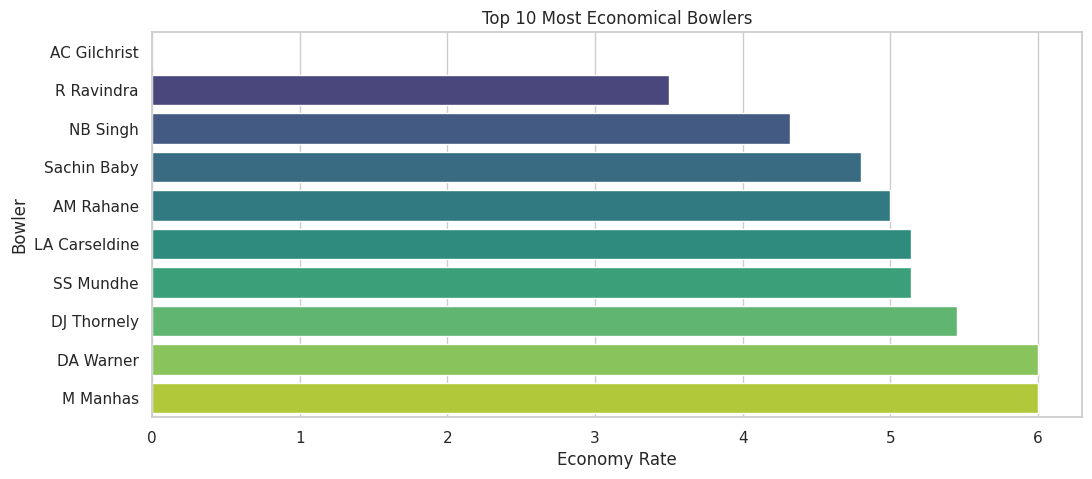

In [ ]:
# 13. Top 10 Most Economical Bowlers
economy = (data.groupby("bowler")["total_runs"].sum() / data.groupby("bowler")["ball"].count() * 6).dropna().nsmallest(10)
plt.figure(figsize=(12, 5))
sns.barplot(y=economy.index, x=economy.values, palette="viridis")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.title("Top 10 Most Economical Bowlers")
plt.show()